In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import numpy as np
from tsfm.model.kairos import AutoModel

In [4]:
# load model and dataset
model = AutoModel.from_pretrained(
    "mldi-lab/Kairos_50m", trust_remote_code=True
)
df = pd.read_csv("./datasets/ETTh1_sample.csv")
col_name = "Target"
df[col_name] = df[col_name].astype(float)

In [5]:
# forecasting configurations
context_length = 2048
prediction_length = 96
forecast = model(
    past_target=torch.tensor(df[col_name][0:context_length].values).float().unsqueeze(0),
    prediction_length=prediction_length,
    generation=True,
    preserve_positivity=True,
    average_with_flipped_input=True
)
forecast = forecast["prediction_outputs"]
forecast_index = range(context_length, context_length + prediction_length)
low, median, high = np.quantile(forecast[0].detach().cpu().numpy(), [0.1, 0.5, 0.9], axis=0)

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
past_key_values should not be None in from_legacy_cache()


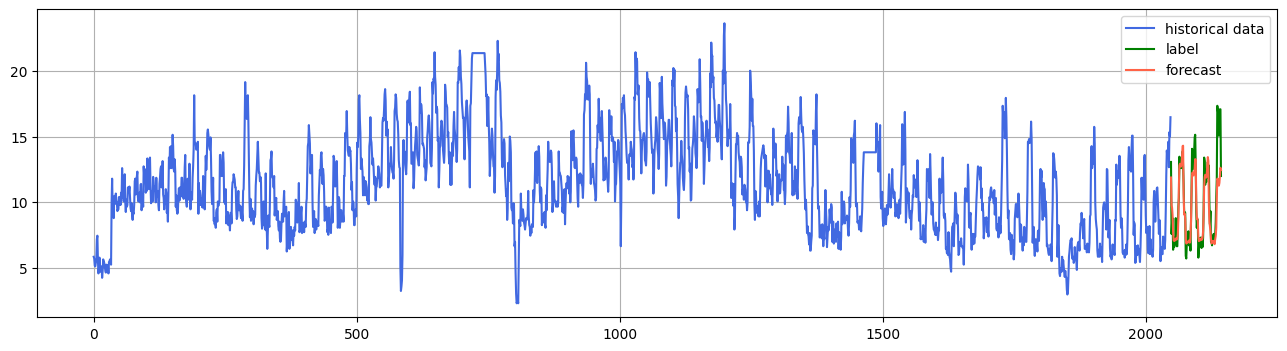

In [6]:
# visualize raw predictions
plt.figure(figsize=(16, 4))
plt.plot(df[col_name][0:context_length], color="royalblue", label="historical data")

plt.plot(df[col_name][context_length:context_length+prediction_length], color="green", label="label")
plt.plot(forecast_index, median, color="tomato", label="forecast")
plt.legend()
plt.grid()
plt.savefig("Kairos_ETTh1_96.png")
plt.show()